# Experiment: Improve Hornsrev1 Layout

In this exercise, you can investigate how changing the turbine positions inside the Hornsrev1 wind farm influences its AEP.

**Install PyWake if needed**

In [ ]:
# Install PyWake if needed
try:
    import py_wake
except ModuleNotFoundError:
    !pip install git+https://gitlab.windenergy.dtu.dk/TOPFARM/PyWake.git

**First we import basic Python elements**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Import and instantiate relevant PyWake objects**

We operate with four fundamental objects in PyWake, namely `Site`, `WindTurbines` and `WindFarmModel`, as explained in the [Overview](https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/Overview.html) section.

In [2]:
#importing the properties of Hornsrev1, which are already stored in PyWake
from py_wake.examples.data.hornsrev1 import V80 
from py_wake.examples.data.hornsrev1 import Hornsrev1Site 
from py_wake.examples.data.hornsrev1 import wt_x, wt_y 

# BastankhahGaussian combines the engineering wind farm model, `PropagateDownwind` with 
# the `BastankhahGaussianDeficit` wake deficit model and the `SquaredSum` super position model 
from py_wake.literature.gaussian_models import Bastankhah_PorteAgel_2014 

# After we import the objects we instatiate them:
site = Hornsrev1Site() 
wt = V80()
windFarmModel = Bastankhah_PorteAgel_2014(site, wt)

#### The `Site` object

There are multiple functionalities available from the [Site](https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/Site.html) object as well as wind conditions, probability and geometry of the wind farm. We can e.g. plot the wind rose with a specific number of bins by using the plot_wd_distribution function:

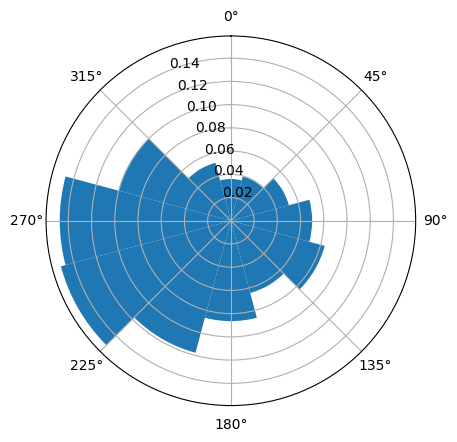

In [3]:
site.plot_wd_distribution(n_wd=12);

#### The `WindTurbine` object

The [Wind turbine](https://topfarm.pages.windenergy.dtu.dk/PyWake/notebooks/WindTurbines.html) object contains relevant information about the turbine used as well as supplying usefull functions. It holds information about the power curve, ct-curve, hub height and diameter and has a plotting function to visualize the layout of the turbines.

Text(0, 0.5, 'y [m]')

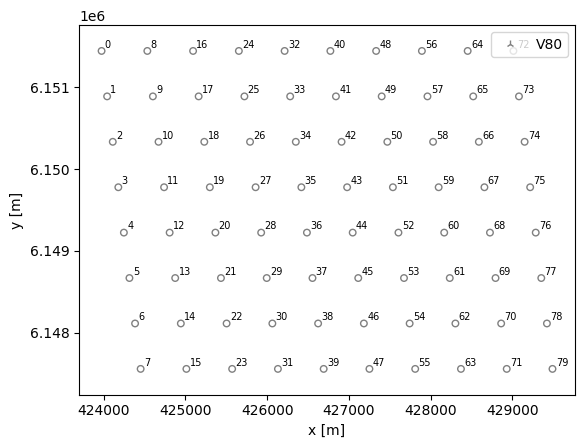

In [4]:
# Original layout
plt.figure()
wt.plot(wt_x, wt_y)
plt.xlabel('x [m]')
plt.ylabel('y [m]')

#### AEP Calculation

In [5]:
# Original AEP
aep_ref = windFarmModel(wt_x,wt_y).aep().sum()
print ('Original AEP: %f GWh'%aep_ref)

Original AEP: 682.040725 GWh


### Exercise: Improve the AEP by modifying turbine locations.

Modify the x and y offsets for the rows and columns to increase the AEP.

Note, the turbines positions are limited by a rectangle surrounding the existing layout.

In [6]:
# Here we define a function to print and plot your new layout. No need to change anything here
def add_offset_plot_and_print(row_offset_x, row_offset_y, col_offset_x, col_offset_y):
    x,y = wt_x, wt_y
    y = np.reshape(y,(10,8)).astype(float)
    x = np.reshape(x,(10,8)).astype(float)

    x+= np.array(row_offset_x)
    y+= np.array(row_offset_y)
    x+= np.array(col_offset_x)[:,np.newaxis]
    y+= np.array(col_offset_y)[:,np.newaxis]
    y = np.maximum(min(wt_y), np.minimum(max(wt_y), y.flatten()))
    x = np.maximum(min(wt_x), np.minimum(max(wt_x), x.flatten()))

    plt.plot()
    plt.plot(wt_x, wt_y,'b.')
    wt.plot(x, y)
    aep = windFarmModel(x,y).aep().sum()
    print ("AEP ref", aep_ref.values)
    print ("AEP", aep.values)
    print ("Increase: %f %%"%((aep-aep_ref)/aep_ref*100))

**Now try to modify the row and column offsets and see if you can improve the AEP**

AEP ref 682.0407252944838
AEP 682.2122958662208
Increase: 0.025155 %


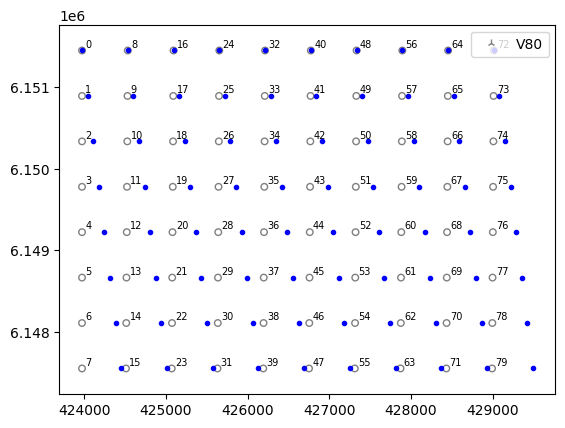

In [7]:
# =======================================
# Specify offsets 
# =======================================

row_offset_x = np.linspace(0,1,8)* -500
row_offset_y = np.linspace(0,1,8) * 0

col_offset_x = np.linspace(0,1,10) * 0
col_offset_y = np.linspace(0,1,10) * 0

add_offset_plot_and_print(row_offset_x, row_offset_y, col_offset_x, col_offset_y)